# Werner State Visibility Sweep

This notebook explores how adding white noise to an entangled Bell state changes its ability to violate the CHSH inequality. By sweeping the Werner-state visibility parameter \(v\), it estimates \(S(v)\) for each point and highlights where the curve drops back below the classical bound of 2. Use it to relate the strength of the shared constraint to the correlations that remain measurable.

In [ ]:
import matplotlib
matplotlib.use('Agg')

First observed violation near v=0.7200


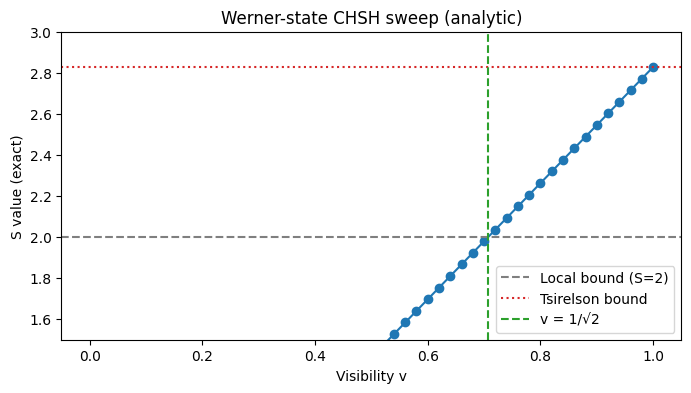

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

from eac.chsh import chsh_exact
from eac.states import werner_state

angles = ((0.0, math.pi / 2), (math.pi / 4, -math.pi / 4))
visibilities = np.linspace(0.0, 1.0, 51)

values = [chsh_exact(werner_state(v), angles).value for v in visibilities]

plt.figure(figsize=(8, 4))
plt.plot(visibilities, values, marker='o')
plt.axhline(2.0, color='tab:gray', linestyle='--', label='Local bound (S=2)')
plt.axhline(2 * math.sqrt(2), color='tab:red', linestyle=':', label='Tsirelson bound')
plt.axvline(1 / math.sqrt(2), color='tab:green', linestyle='--', label='v = 1/√2')
plt.xlabel('Visibility v')
plt.ylabel('S value (exact)')
plt.ylim(1.5, 3.0)
plt.title('Werner-state CHSH sweep (analytic)')
plt.legend(loc='lower right')
plt.savefig('werner_threshold.png', dpi=150, bbox_inches='tight')
from IPython.display import Image
Image('werner_threshold.png')

violating = [v for v, s in zip(visibilities, values) if s > 2.0]
if violating:
    first_violation = violating[0]
    print(f"First observed violation near v={first_violation:.4f}")
else:
    print("No violation observed; adjust the visibility grid.")

## Adjust the experiment

Play with the `visibilities`, `shots`, or even the angle tuples to see how the
constraint weakens or strengthens.